# **Elección de dataframe**

De entre los múltiples datasets revisados elegí "US  E-commerce records 2020", ya que cuenta con muchos valores categóricos y también con suficientes valores numéricos como para llevar a cabo un análisis satisfactorio. Además cumple con los estándares que necesita, es decir, al menos 15 columnas (19) y al menos 2000 filas (3312).

Además, no tiene valores nulos, lo cual facilita su análisis.

Finalmente, también creo que se pueden hacer algunas predicciones o clasificaciones con este dataset por la forma en la que está constituido.

In [ ]:
import pandas as pd
df = pd.read_csv(r'/content/e-commerce-us.csv', index_col='Row ID', encoding='windows-1252')
df.head(3)

,Order Date,Order ID,Ship Mode,Customer ID,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Row ID,,,,,,,,,,,,,,,,,,
849,01-01-20,CA-2017-107503,Standard Class,GA-14725,Consumer,United States,Lorain,Ohio,44052,East,FUR-FU-10003878,Furniture,Furnishings,"Linden 10"" Round Wall Clock, Black",48.896,4,0.2,8.5568
4010,01-01-20,CA-2017-144463,Standard Class,SC-20725,Consumer,United States,Los Angeles,California,90036,West,FUR-FU-10001215,Furniture,Furnishings,"Howard Miller 11-1/2"" Diameter Brentwood Wall ...",474.430,11,0.0,199.2606
6683,01-01-20,CA-2017-154466,First Class,DP-13390,Home Office,United States,Franklin,Wisconsin,53132,Central,OFF-BI-10002012,Office Supplies,Binders,Wilson Jones Easy Flow II Sheet Lifters,3.600,2,0.0,1.7280


In [ ]:
df.shape

(3312, 18)

In [ ]:
df.dtypes

Order Date       object
Order ID         object
Ship Mode        object
Customer ID      object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Product ID       object
Category         object
Sub-Category     object
Product Name     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

Aquí tomo la decision de convertir la columna 'Postal Code' a String pues no me sirve realizar análisis estadístico sobre esta.

Igualmente la columna Order Date la volveré de tipo date y obtendré una columna extra con mes y año, para poder hacer un análisis por periodo.

In [ ]:
df['Postal Code'] = df['Postal Code'].apply(str)
df['Order Date'] = pd.to_datetime(df['Order Date'])
#df['month_year'] = df['Order Date'].dt.to_period('M')
#df['month_year'] = df['month_year'].astype(str)
df['month_year'] = pd.to_datetime(df['Order Date'], format='%b-%Y')

In [ ]:
df.describe()

,Sales,Quantity,Discount,Profit
count,3312.000000,3312.000000,3312.000000,3312.000000
mean,221.381418,3.766908,0.156467,28.212340
std,585.257531,2.221776,0.207429,241.864342
min,0.444000,1.000000,0.000000,-3839.990400
25%,17.018000,2.000000,0.000000,1.763200
50%,53.810000,3.000000,0.200000,8.296800
75%,205.105700,5.000000,0.200000,28.315125
max,13999.960000,14.000000,0.800000,6719.980800


In [ ]:
#by_category = df.groupby(['Category','Sub-Category']).sum()
by_period = df.groupby('month_year').sum()

<ipython-input-267-498493087852>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  by_period = df.groupby('month_year').sum()


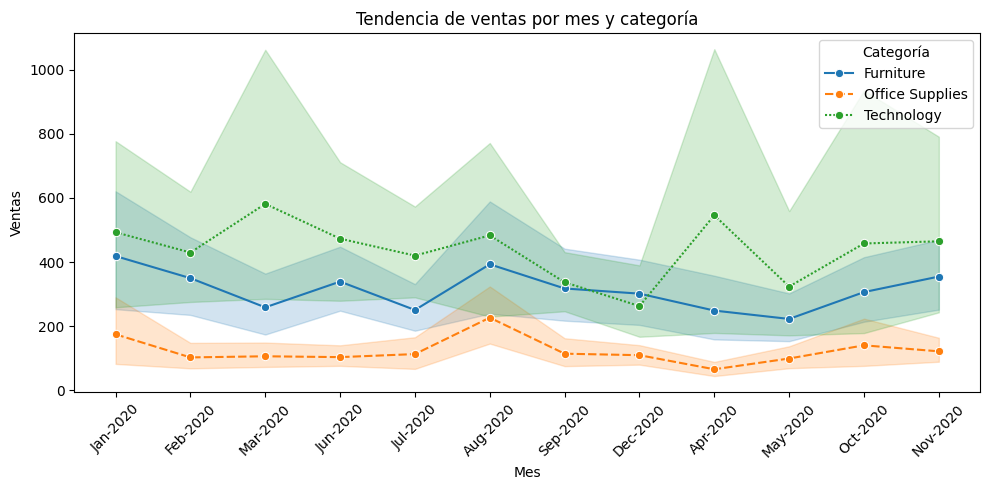

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv(r'/content/e-commerce-us.csv', index_col='Row ID', encoding='windows-1252')

df['Postal Code'] = df['Postal Code'].apply(str)
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Month_Year'] = df['Order Date'].dt.strftime('%b-%Y')


plt.figure(figsize=(10, 5))
sns.lineplot(data=df, x='Month_Year', y='Sales', hue='Category', marker='o', style='Category')
plt.title('Tendencia de ventas por mes y categoría')
plt.xlabel('Mes')
plt.ylabel('Ventas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(title='Categoría')
plt.show()

<ipython-input-312-6a7c16426eaa>:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Month_Year', y='Sales', hue='Category', estimator=sum, ci=None)


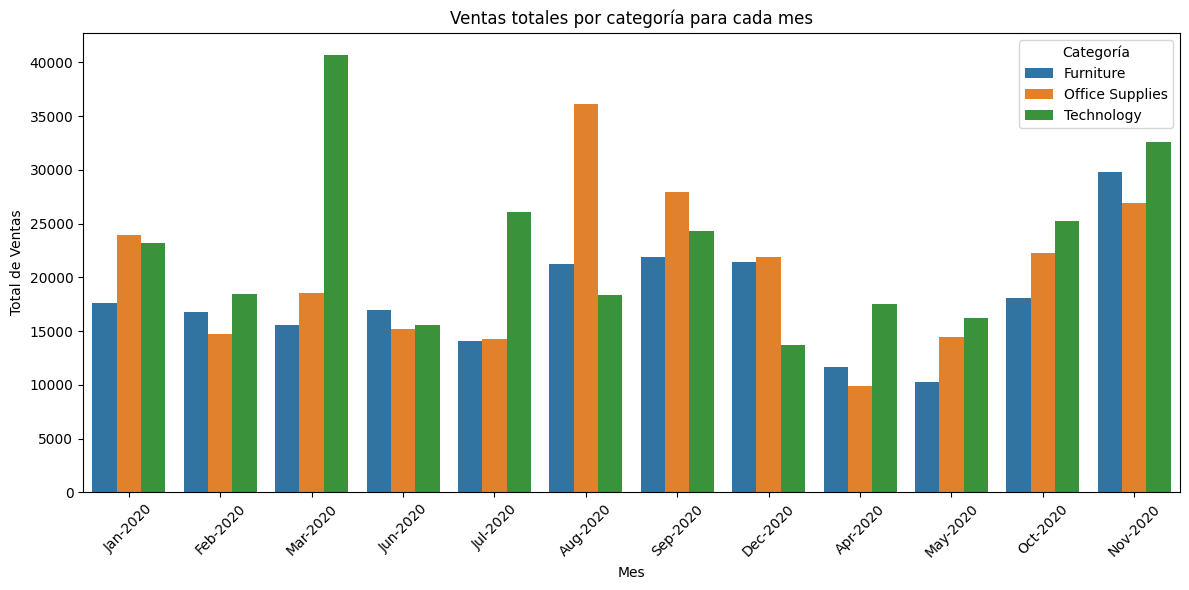

<ipython-input-312-6a7c16426eaa>:26: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Month_Year', y='Quantity', hue='Category', estimator=sum, ci=None)


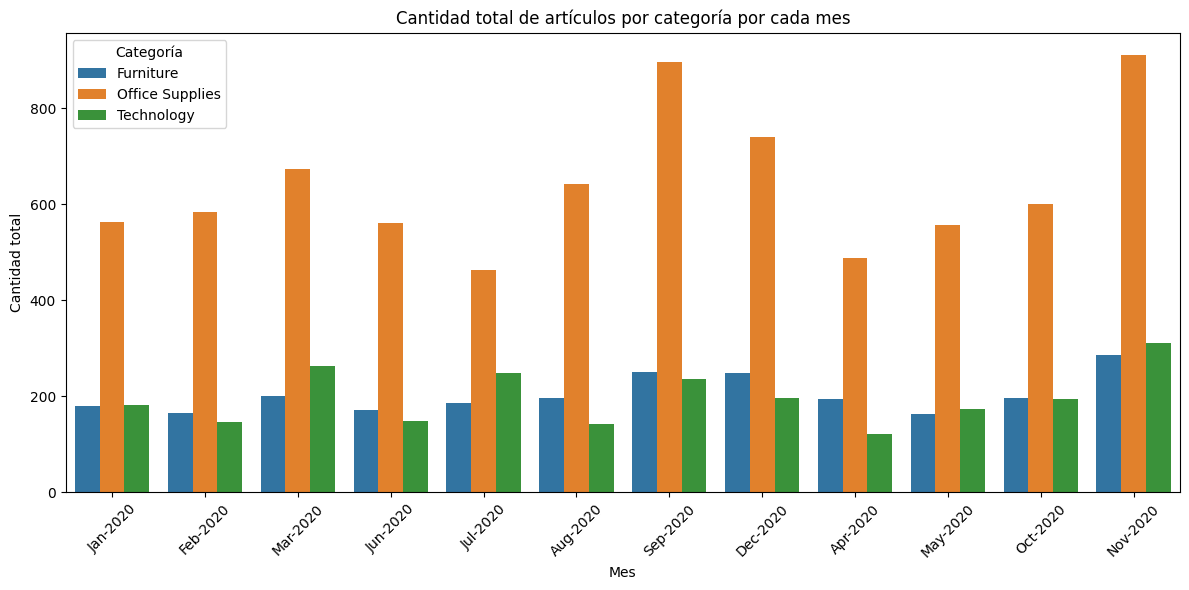

<ipython-input-312-6a7c16426eaa>:36: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Month_Year', y='Profit', hue='Category', estimator=sum, ci=None)


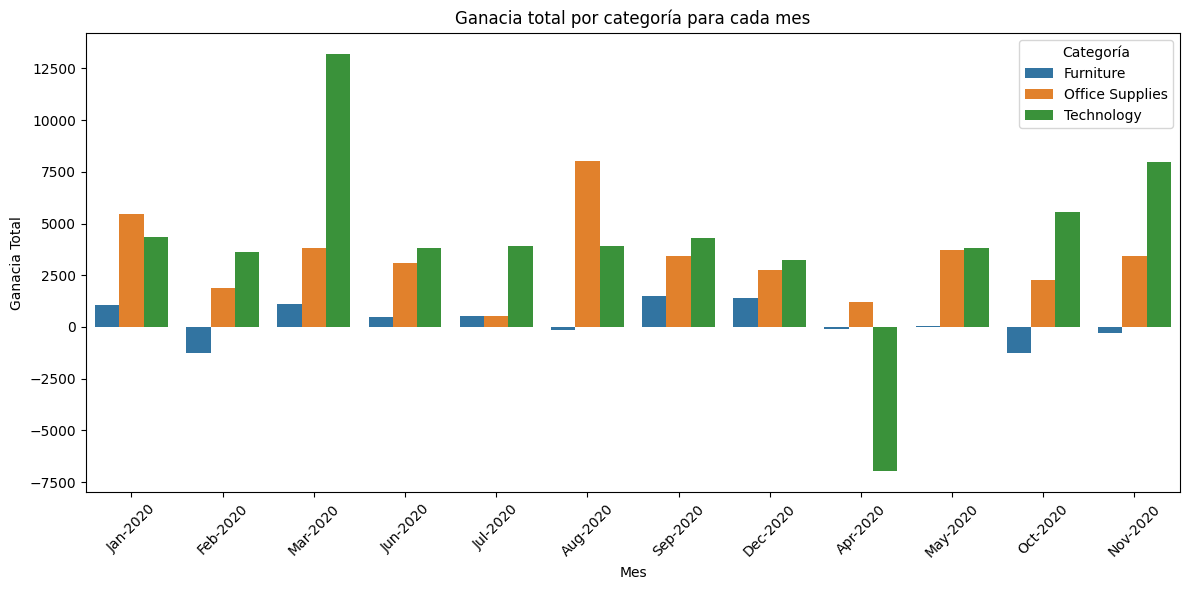

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv(r'/content/e-commerce-us.csv', index_col='Row ID', encoding='windows-1252')

df['Postal Code'] = df['Postal Code'].apply(str)
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Month_Year'] = df['Order Date'].dt.strftime('%b-%Y')
df['Sub_Category'] = df['Sub-Category']


# Total sales, quantity, and profit across different categories for each 'Month_Year'
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Month_Year', y='Sales', hue='Category', estimator=sum, ci=None)
plt.title('Ventas totales por categoría para cada mes')
plt.xlabel('Mes')
plt.ylabel('Total de Ventas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(title='Categoría')
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Month_Year', y='Quantity', hue='Category', estimator=sum, ci=None)
plt.title('Cantidad total de artículos por categoría por cada mes')
plt.xlabel('Mes')
plt.ylabel('Cantidad total')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(title='Categoría')
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Month_Year', y='Profit', hue='Category', estimator=sum, ci=None)
plt.title('Ganacia total por categoría para cada mes')
plt.xlabel('Mes')
plt.ylabel('Ganacia Total')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(title='Categoría')
plt.show()


A partir de estas visualizaciones podemos inferir algunas cosas:


*   Hubo algunas pérdidas durante el mes de Abril para la categoría de tecnología.
*   La mayor cantidad de artículos los vende la categoría de artículos de oficina.
*   La categoría de 'Furnitute' es la que menos ganancias genera.


